In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
#Load in raw data to dataframe
file_path = "CPI - All Items.csv"
CPIA_df = pd.read_csv(file_path)
CPIA_df

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990


In [98]:
#Rename the price column
CPIA_df.rename(mapper={"CPIAUCSL" : "All Items - Index (1982-1984=100)"}, axis=1, inplace=True)
CPIA_df.head()

,DATE,All Items - Index (1982-1984=100)
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [99]:
#Rename the price column
CPIA_df.rename(mapper={"DATE" : "date_time"}, axis=1, inplace=True)
CPIA_df.head()

,date_time,All Items - Index (1982-1984=100)
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [100]:
CPIA_df.dtypes

date_time                             object
All Items - Index (1982-1984=100)    float64
dtype: object

In [101]:
#Change DATE to datetime
CPIA_df['date_time'] = pd.to_datetime(CPIA_df["date_time"], format="%Y-%m-%d")
CPIA_df.head()

,date_time,All Items - Index (1982-1984=100)
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [102]:
CPIA_df.dtypes

date_time                            datetime64[ns]
All Items - Index (1982-1984=100)           float64
dtype: object

In [103]:
#check if there are null values
CPIA_df.isnull().sum()

date_time                            0
All Items - Index (1982-1984=100)    0
dtype: int64

In [104]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPIA_df = CPIA_df[CPIA_df["date_time"] >= "1989-01-01"]
cleaned_CPIA_df

,date_time,All Items - Index (1982-1984=100)
504,1989-01-01,121.200
505,1989-02-01,121.600
506,1989-03-01,122.200
507,1989-04-01,123.100
508,1989-05-01,123.700
...,...,...
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990


In [105]:
# Calculate annual percent change
cleaned_CPIA_df["All Items - Pct_Change (Yearly)"] = cleaned_CPIA_df["All Items - Index (1982-1984=100)"].pct_change(periods=12)
cleaned_CPIA_df["All Items - Pct_Change (Monthly)"] = cleaned_CPIA_df["All Items - Index (1982-1984=100)"].pct_change(periods=1)
cleaned_CPIA_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_time,All Items - Index (1982-1984=100),All Items - Pct_Change (Yearly),All Items - Pct_Change (Monthly)
504,1989-01-01,121.2,NaN,NaN
505,1989-02-01,121.6,NaN,0.003300
506,1989-03-01,122.2,NaN,0.004934
507,1989-04-01,123.1,NaN,0.007365
508,1989-05-01,123.7,NaN,0.004874
509,1989-06-01,124.1,NaN,0.003234
510,1989-07-01,124.5,NaN,0.003223
511,1989-08-01,124.5,NaN,0.000000
512,1989-09-01,124.8,NaN,0.002410
513,1989-10-01,125.4,NaN,0.004808


In [106]:
# Multiply by 100
cleaned_CPIA_df["All Items - Pct_Change (Yearly)"] = cleaned_CPIA_df["All Items - Pct_Change (Yearly)"] * 100
cleaned_CPIA_df["All Items - Pct_Change (Monthly)"] = cleaned_CPIA_df["All Items - Pct_Change (Monthly)"] * 100
cleaned_CPIA_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_time,All Items - Index (1982-1984=100),All Items - Pct_Change (Yearly),All Items - Pct_Change (Monthly)
504,1989-01-01,121.2,NaN,NaN
505,1989-02-01,121.6,NaN,0.330033
506,1989-03-01,122.2,NaN,0.493421
507,1989-04-01,123.1,NaN,0.736498
508,1989-05-01,123.7,NaN,0.487409
509,1989-06-01,124.1,NaN,0.323363
510,1989-07-01,124.5,NaN,0.322321
511,1989-08-01,124.5,NaN,0.000000
512,1989-09-01,124.8,NaN,0.240964
513,1989-10-01,125.4,NaN,0.480769


In [107]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPIA_df = cleaned_CPIA_df[cleaned_CPIA_df["date_time"] >= "1990-01-01"]
cleaned_CPIA_df

,date_time,All Items - Index (1982-1984=100),All Items - Pct_Change (Yearly),All Items - Pct_Change (Monthly)
516,1990-01-01,127.500,5.198020,0.950119
517,1990-02-01,128.000,5.263158,0.392157
518,1990-03-01,128.600,5.237316,0.468750
519,1990-04-01,128.900,4.711617,0.233281
520,1990-05-01,129.100,4.365400,0.155159
...,...,...,...,...
908,2022-09-01,296.539,8.214854,0.412773
909,2022-10-01,297.987,7.762493,0.488300
910,2022-11-01,298.598,7.135348,0.205043
911,2022-12-01,298.990,6.444940,0.131280


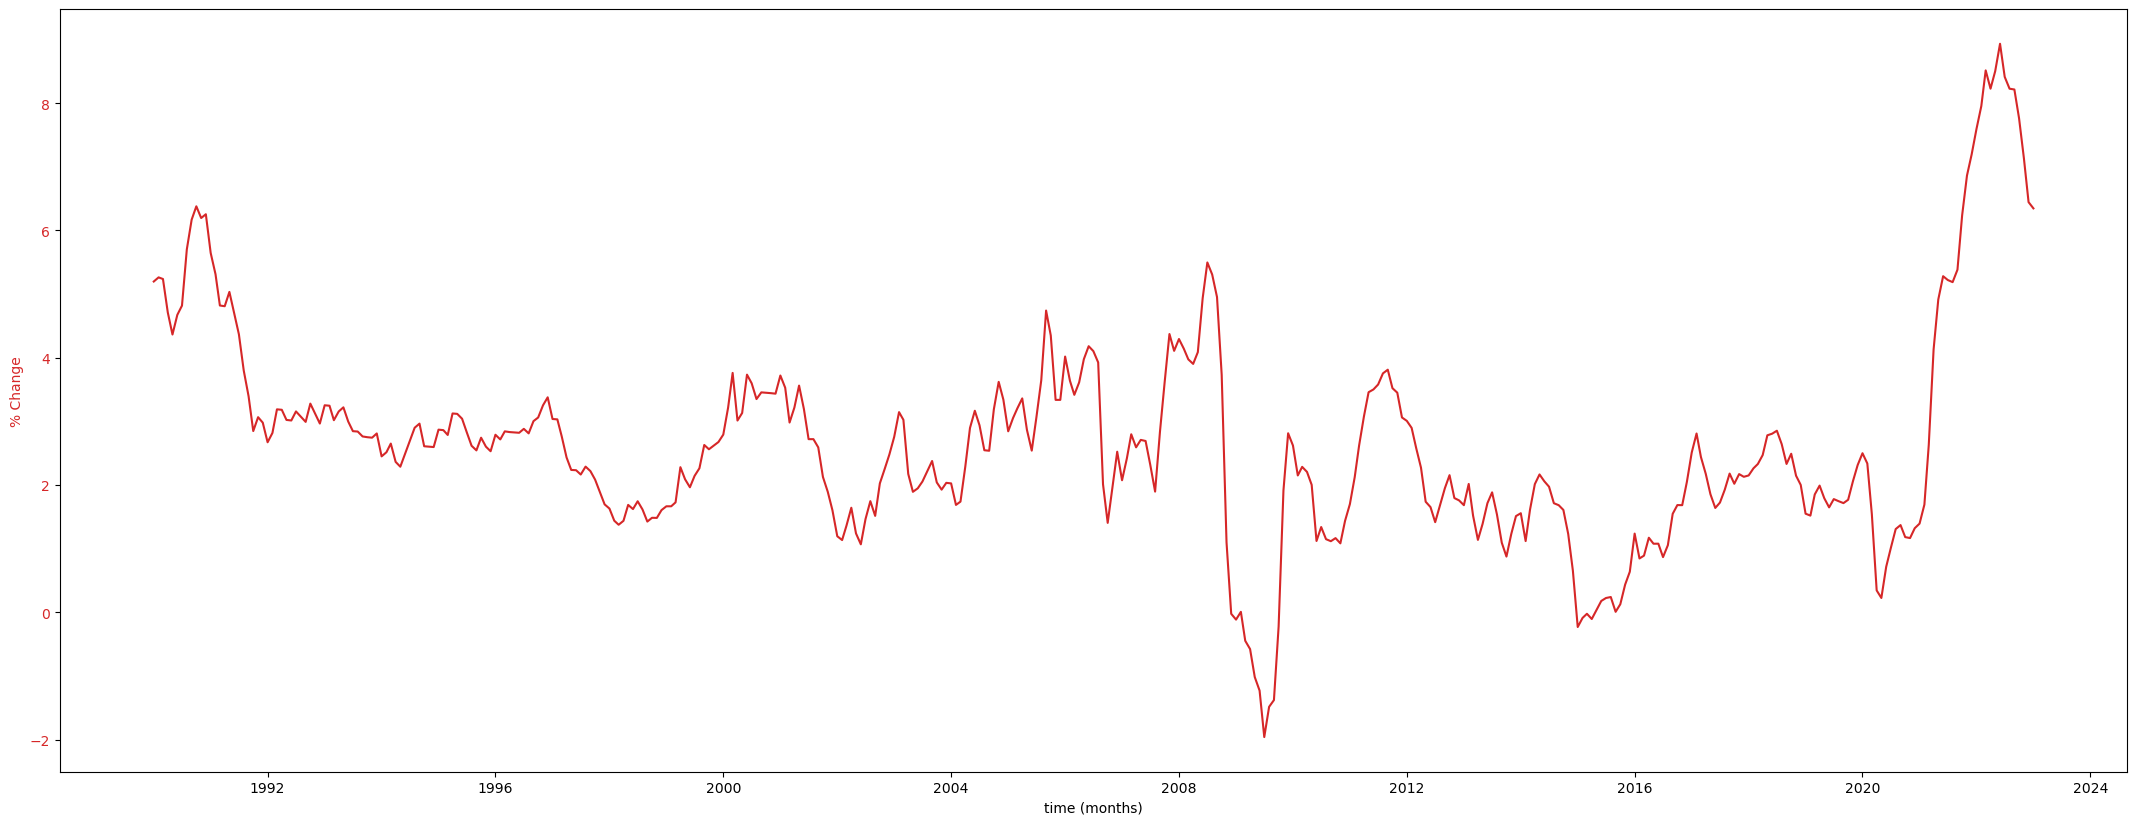

In [108]:
t = cleaned_CPIA_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('% Change', color=color)
ax1.plot(t, cleaned_CPIA_df["All Items - Pct_Change (Yearly)"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(24, 9)
plt.show()

In [109]:
# Store new DF as new csv file
output_path = "Output/CPI_All_Items.csv"
cleaned_CPIA_df.to_csv(output_path)

In [110]:
file_path = "Food_CPI_data.csv"
CPI_df = pd.read_csv(file_path)
CPI_df

,DATE,CUSR0000SAF112
0,1967-01-01,38.100
1,1967-02-01,38.000
2,1967-03-01,37.800
3,1967-04-01,37.500
4,1967-05-01,37.400
...,...,...
668,2022-09-01,318.374
669,2022-10-01,319.917
670,2022-11-01,320.034
671,2022-12-01,322.507


In [111]:
#Rename the price column
CPI_df.rename(mapper={"CUSR0000SAF112" : "Food - Index (1982-1984=100)"}, axis=1, inplace=True)
CPI_df.head()

,DATE,Food - Index (1982-1984=100)
0,1967-01-01,38.1
1,1967-02-01,38.0
2,1967-03-01,37.8
3,1967-04-01,37.5
4,1967-05-01,37.4


In [112]:
#Change DATE to datetime
CPI_df['DATE'] = pd.to_datetime(CPI_df["DATE"], format="%Y-%m-%d")
CPI_df.head()

,DATE,Food - Index (1982-1984=100)
0,1967-01-01,38.1
1,1967-02-01,38.0
2,1967-03-01,37.8
3,1967-04-01,37.5
4,1967-05-01,37.4


In [113]:
#check if there are null values
CPI_df.isnull().sum()

DATE                            0
Food - Index (1982-1984=100)    0
dtype: int64

In [114]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPI_df = CPI_df[CPI_df["DATE"] >= "1989-01-01"]
cleaned_CPI_df

,DATE,Food - Index (1982-1984=100)
264,1989-01-01,117.900
265,1989-02-01,118.400
266,1989-03-01,120.400
267,1989-04-01,120.900
268,1989-05-01,121.600
...,...,...
668,2022-09-01,318.374
669,2022-10-01,319.917
670,2022-11-01,320.034
671,2022-12-01,322.507


In [115]:
# rename "DATE" column to "date_time" per team data process in README
cleaned_CPI_df.rename(mapper={"DATE" : "date_time"}, axis=1, inplace=True)
cleaned_CPI_df.head()

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date_time,Food - Index (1982-1984=100)
264,1989-01-01,117.9
265,1989-02-01,118.4
266,1989-03-01,120.4
267,1989-04-01,120.9
268,1989-05-01,121.6


In [116]:
# Calculate percent change yearly and monthly
cleaned_CPI_df["Food - Pct_Change (Yearly)"] = cleaned_CPI_df["Food - Index (1982-1984=100)"].pct_change(periods=12)
cleaned_CPI_df["Food - Pct_Change (Monthly)"] = cleaned_CPI_df["Food - Index (1982-1984=100)"].pct_change(periods=1)
cleaned_CPI_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_time,Food - Index (1982-1984=100),Food - Pct_Change (Yearly),Food - Pct_Change (Monthly)
264,1989-01-01,117.9,NaN,NaN
265,1989-02-01,118.4,NaN,0.004241
266,1989-03-01,120.4,NaN,0.016892
267,1989-04-01,120.9,NaN,0.004153
268,1989-05-01,121.6,NaN,0.005790
269,1989-06-01,122.1,NaN,0.004112
270,1989-07-01,121.7,NaN,-0.003276
271,1989-08-01,121.9,NaN,0.001643
272,1989-09-01,122.5,NaN,0.004922
273,1989-10-01,122.2,NaN,-0.002449


In [117]:
# Calculate percent change
cleaned_CPI_df["Food - Pct_Change (Yearly)"] = cleaned_CPI_df["Food - Pct_Change (Yearly)"] * 100
cleaned_CPI_df["Food - Pct_Change (Monthly)"] = cleaned_CPI_df["Food - Pct_Change (Monthly)"] * 100
cleaned_CPI_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_time,Food - Index (1982-1984=100),Food - Pct_Change (Yearly),Food - Pct_Change (Monthly)
264,1989-01-01,117.9,NaN,NaN
265,1989-02-01,118.4,NaN,0.424088
266,1989-03-01,120.4,NaN,1.689189
267,1989-04-01,120.9,NaN,0.415282
268,1989-05-01,121.6,NaN,0.578991
269,1989-06-01,122.1,NaN,0.411184
270,1989-07-01,121.7,NaN,-0.327600
271,1989-08-01,121.9,NaN,0.164339
272,1989-09-01,122.5,NaN,0.492207
273,1989-10-01,122.2,NaN,-0.244898


In [118]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPI_df = cleaned_CPI_df[cleaned_CPI_df["date_time"] >= "1990-01-01"]
cleaned_CPI_df

,date_time,Food - Index (1982-1984=100),Food - Pct_Change (Yearly),Food - Pct_Change (Monthly)
276,1990-01-01,126.100,6.955047,1.857835
277,1990-02-01,127.000,7.263514,0.713719
278,1990-03-01,127.400,5.813953,0.314961
279,1990-04-01,128.100,5.955335,0.549451
280,1990-05-01,128.200,5.427632,0.078064
...,...,...,...,...
668,2022-09-01,318.374,8.964276,0.296441
669,2022-10-01,319.917,8.002714,0.484650
670,2022-11-01,320.034,6.721044,0.036572
671,2022-12-01,322.507,7.644424,0.772730


In [119]:
merge_CPI_df = cleaned_CPI_df.merge(cleaned_CPIA_df, left_on='date_time', right_on='date_time')
merge_CPI_df

,date_time,Food - Index (1982-1984=100),Food - Pct_Change (Yearly),Food - Pct_Change (Monthly),All Items - Index (1982-1984=100),All Items - Pct_Change (Yearly),All Items - Pct_Change (Monthly)
0,1990-01-01,126.100,6.955047,1.857835,127.500,5.198020,0.950119
1,1990-02-01,127.000,7.263514,0.713719,128.000,5.263158,0.392157
2,1990-03-01,127.400,5.813953,0.314961,128.600,5.237316,0.468750
3,1990-04-01,128.100,5.955335,0.549451,128.900,4.711617,0.233281
4,1990-05-01,128.200,5.427632,0.078064,129.100,4.365400,0.155159
...,...,...,...,...,...,...,...
392,2022-09-01,318.374,8.964276,0.296441,296.539,8.214854,0.412773
393,2022-10-01,319.917,8.002714,0.484650,297.987,7.762493,0.488300
394,2022-11-01,320.034,6.721044,0.036572,298.598,7.135348,0.205043
395,2022-12-01,322.507,7.644424,0.772730,298.990,6.444940,0.131280


In [121]:
# correlation between percentage changes
print(merge_CPI_df["All Items - Pct_Change (Yearly)"].corr(merge_CPI_df["Food - Pct_Change (Yearly)"]))

0.4522844781610915


In [122]:
# correlation between pindex values
print(merge_CPI_df["All Items - Index (1982-1984=100)"].corr(merge_CPI_df["Food - Index (1982-1984=100)"]))

0.985474624291152


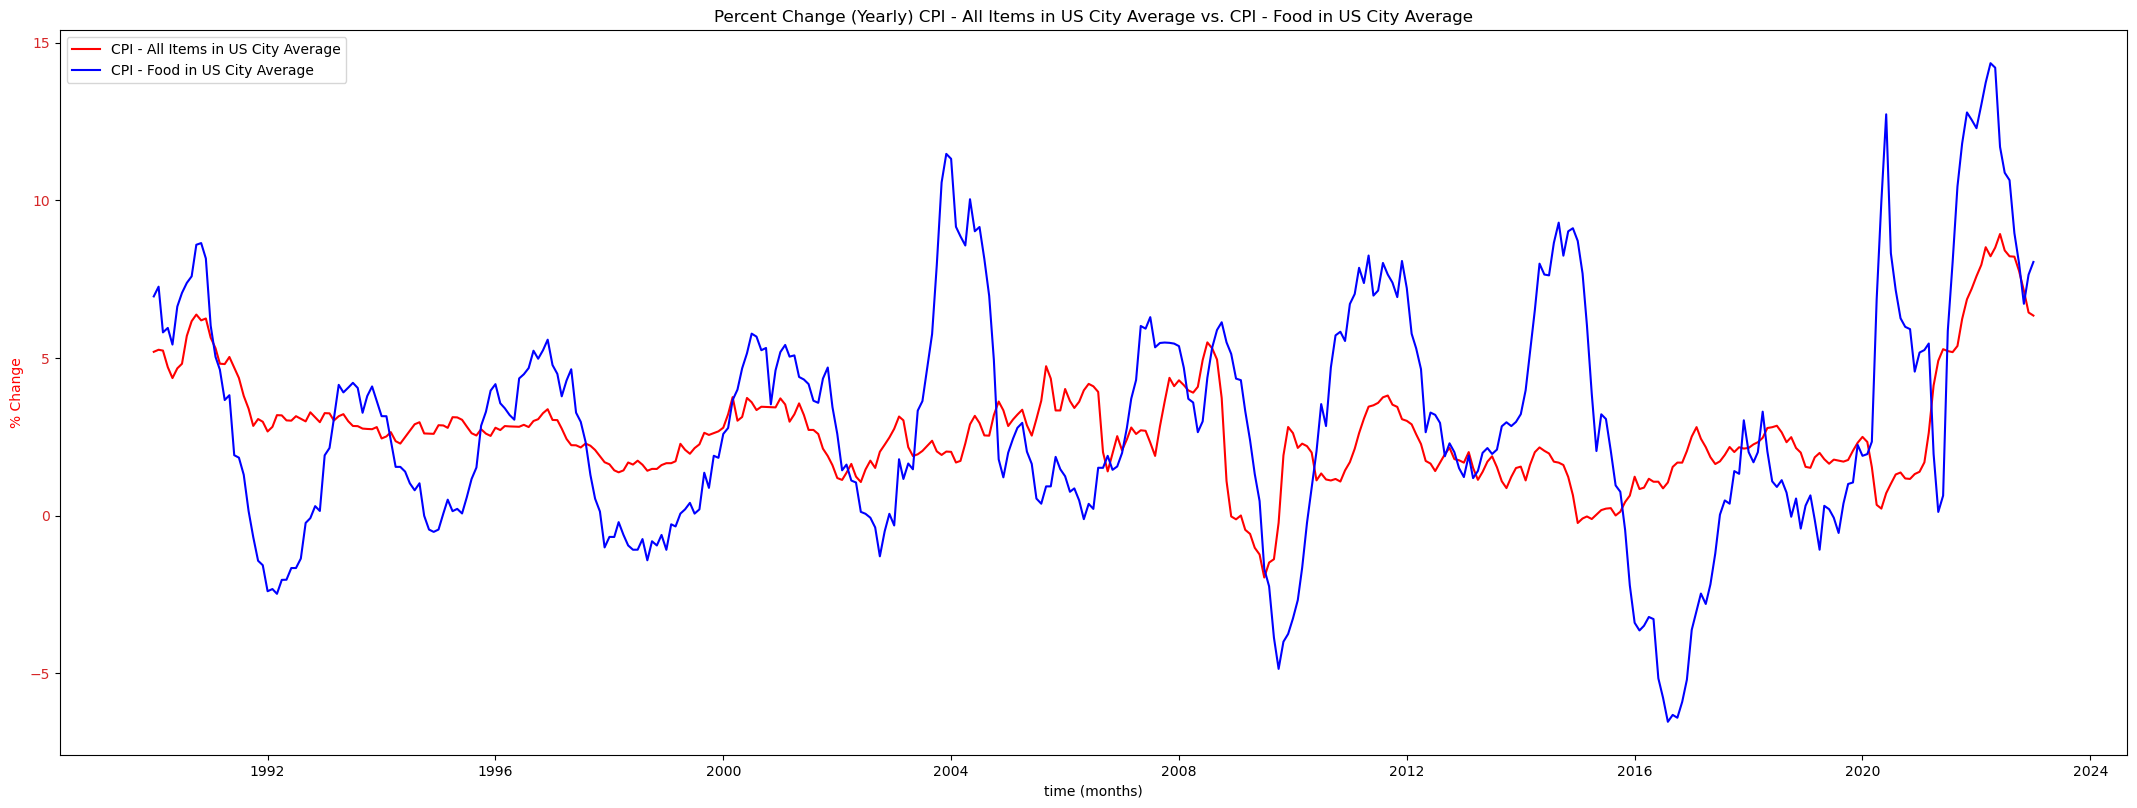

In [124]:
t = merge_CPI_df["date_time"].values

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (months)')
ax1.set_ylabel('% Change', color="red")
ax1.plot(t, merge_CPI_df["All Items - Pct_Change (Yearly)"], color="red")
ax1.plot(t, merge_CPI_df["Food - Pct_Change (Yearly)"], color="blue")
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_title('Percent Change (Yearly) CPI - All Items in US City Average vs. CPI - Food in US City Average')
ax1.legend(['CPI - All Items in US City Average','CPI - Food in US City Average'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(24, 9)
plt.show()

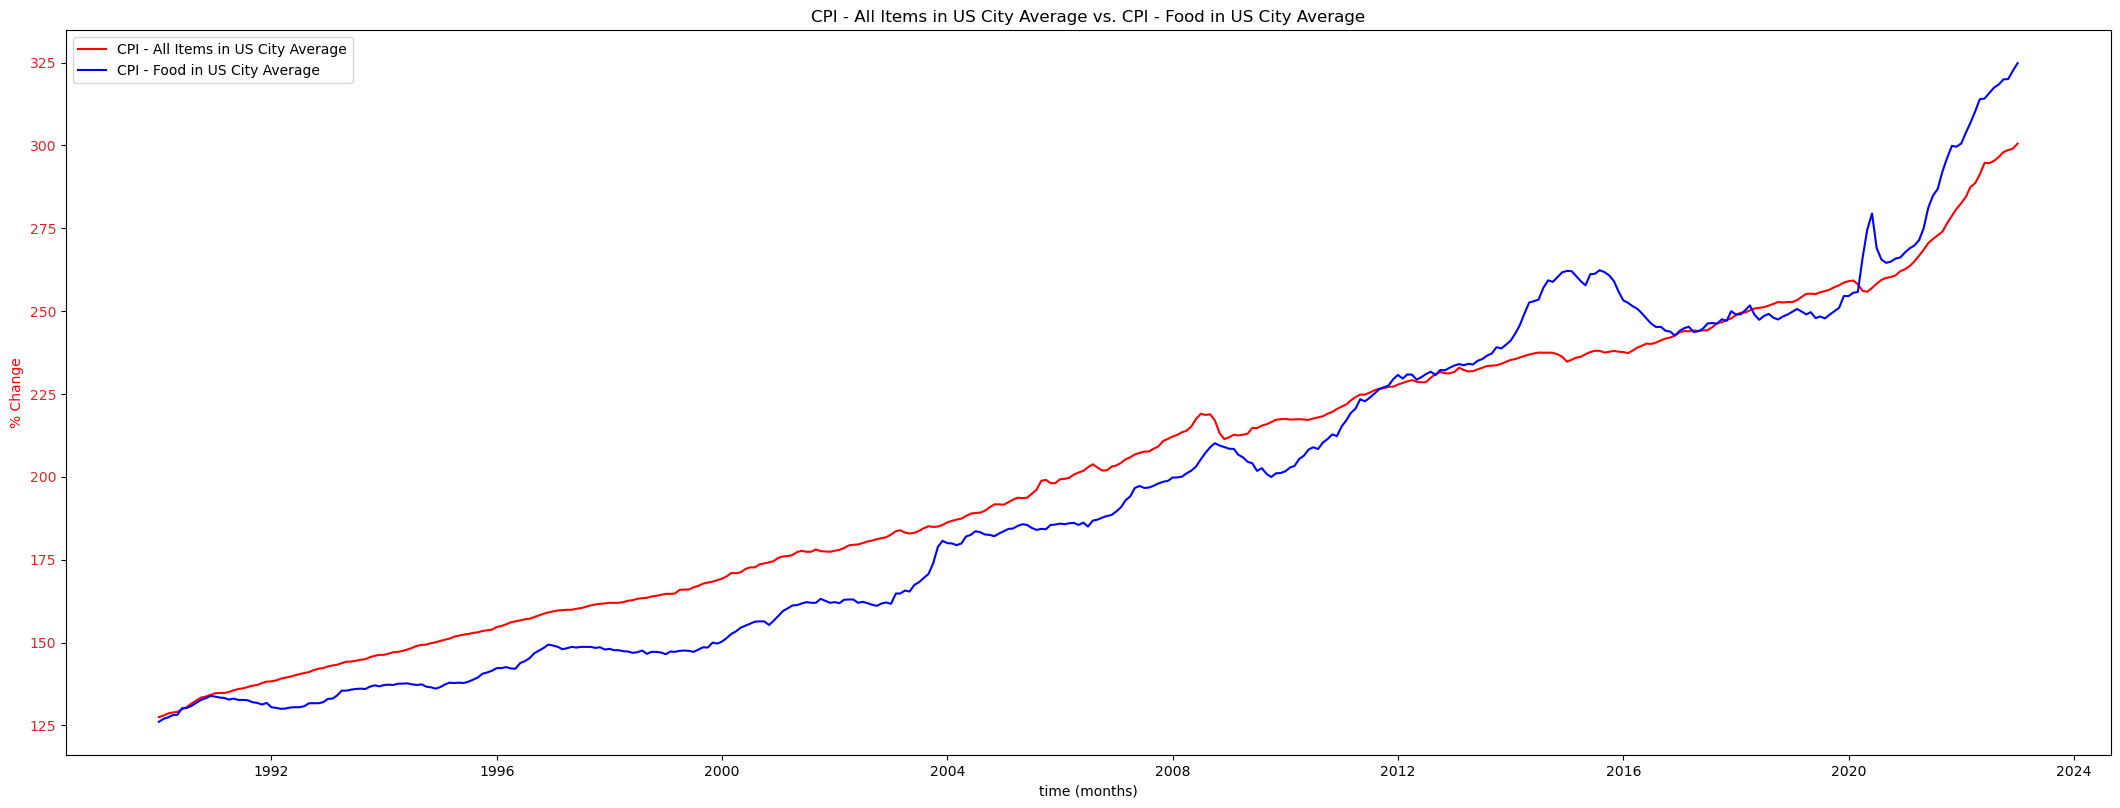

In [125]:
t = merge_CPI_df["date_time"].values

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (months)')
ax1.set_ylabel('% Change', color="red")
ax1.plot(t, merge_CPI_df["All Items - Index (1982-1984=100)"], color="red")
ax1.plot(t, merge_CPI_df["Food - Index (1982-1984=100)"], color="blue")
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_title('CPI - All Items in US City Average vs. CPI - Food in US City Average')
ax1.legend(['CPI - All Items in US City Average','CPI - Food in US City Average'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(24, 9)
plt.show()

In [127]:
# Store new DF as new csv file
output_path = "Output/CPI_Comp.csv"
merge_CPI_df.to_csv(output_path)